# Transfer learning task (edited)
## Table of contents
<ul>
<li><a href= "#intro"> Introduction</a></li>
<li><a href="#prep">Data preparation</a></li>
<li><a href="#aug">Data Augmentation</a></li>
<li><a href="#pre">Using pre-trained model</a></li>
<li><a href="#vector"> Using feature vector</a></li>

</ul>

<a id = "intro"> </a>
## Introduction
using imagenet pretrained model and its featurevector from tensorflow hub
https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

it accepts only the input shape of 224 with 3 channels


<a id= "prep"></a>
## Data preparation


In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 92% 206M/225M [00:01<00:00, 176MB/s]
100% 225M/225M [00:01<00:00, 152MB/s]


In [ ]:
!unzip \*.zip && rm *.zip


In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


**Note that** here os.listdir read the folder names in a wrong order, I do not know why but the right order was:
1. daisy
2. dandeliion
3. rose
4. sunflower
5. tulip
and it is the same order in every directory(folder you will counter)
it is imortant to observe changes of every code you write

In [9]:
base ='/content/'
data_dir = os.path.join(base,'flowers')
os.listdir(data_dir)



['tulip', 'dandelion', 'sunflower', 'rose', 'daisy']

In [10]:
number_of_images=[]
for name in os.listdir(data_dir):
  for n in os.listdir(os.path.join(data_dir,name)):
    number_of_images.append(n)
len(number_of_images)   

4317

4317 images inside flowers directory

The kaggle data is as the following:
a base folder called "flowers" contains the five classes of the data.
To split the data into train, validation, and test folders and have the five classed inside each, you need split-folders package.

In [11]:
!pip install split-folders

In [12]:
import splitfolders


splitfolders.ratio("flowers", output="all_data",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values
    #ratio =(train,validation, and test respectivly)

Copying files: 4317 files [00:00, 5311.54 files/s]


In [13]:
base= '/content/all_data'
train_dir = os.path.join(base,'train')
os.listdir(train_dir)

['tulip', 'dandelion', 'sunflower', 'rose', 'daisy']

In [14]:
val_dir = os.path.join(base,'val')
os.listdir(val_dir)

['tulip', 'dandelion', 'sunflower', 'rose', 'daisy']

In [15]:
test_dir = os.path.join(base,'test')
os.listdir(test_dir)

['tulip', 'dandelion', 'sunflower', 'rose', 'daisy']

In [16]:
t_no = []
for name in os.listdir(train_dir):
  for n in os.listdir(os.path.join(train_dir, name)):
    t_no.append(n )
len(t_no)    

3019

3019 images inside all_data/train folder

In [17]:
v_no = []
for name in os.listdir(val_dir):
  for n in os.listdir(os.path.join(val_dir, name)):
    v_no.append(n )
len(v_no)    

860

In [18]:
ts_no = []
for name in os.listdir(test_dir):
  for n in os.listdir(os.path.join(test_dir, name)):
    ts_no.append(n )
len(ts_no)    

438

<a id="aug"></a>
## Data Augmentation
### flip, rotate , zoom ,rescale(normalize), and resize the image

In [19]:
BATCH_SIZE = 100
IMAGE_SHAPE = (224, 224) # the model input shape is 224 accoriding to the model documentation
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=test_dir,
                                                     shuffle=True,
                                                     target_size= IMAGE_SHAPE,
                                                     class_mode='binary')


Found 438 images belonging to 5 classes.


In [20]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)


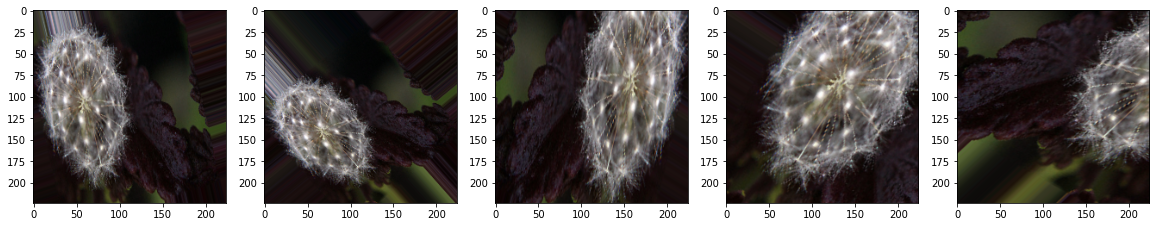

In [21]:
augmented_images = [train_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [22]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=IMAGE_SHAPE,
                                                 class_mode='binary')

Found 860 images belonging to 5 classes.


In [23]:
image_test = ImageDataGenerator(rescale=1./255)

test_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=IMAGE_SHAPE,
                                                 class_mode='binary')

Found 438 images belonging to 5 classes.


<a id ="pre"></a>
## Trying the original pre-trained model without feature vector(modifing the last layer)

In [24]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [24]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt


--2022-05-20 22:13:12--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt’

ImageNetLabels.txt  100%[===================>]  10.24K  --.-KB/s    in 0s      

2022-05-20 22:13:12 (112 MB/s) - ‘ImageNetLabels.txt’ saved [10484/10484]



In [25]:
predicted = classifier.predict(np.array([train_gen[0][0][0]]))
index_pre = np.argmax(predicted, axis=1)
index_pre

array([581])

In [26]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:10] #the index of the above classification

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [27]:
image_labels[581]

'greenhouse'

The model ofcourse get it wrong because it is not trained on our flower classes

<a id ="vector"></a>
## Feature vector (transfer learning)
train the pre-trained model

In [25]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_last_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_last_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])



In [27]:

history = model.fit_generator(
    train_gen,
    steps_per_epoch= 438 //BATCH_SIZE,
    epochs= 20, 
    validation_data=val_gen,
    validation_steps=860 //BATCH_SIZE
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
4/4 [==============================] - 14s 3s/step - loss: 1.9698 - acc: 0.1775 - val_loss: 1.7293 - val_acc: 0.2438
Epoch 2/20
4/4 [==============================] - 10s 3s/step - loss: 1.6272 - acc: 0.3107 - val_loss: 1.5093 - val_acc: 0.3650
Epoch 3/20
4/4 [==============================] - 10s 3s/step - loss: 1.3508 - acc: 0.4349 - val_loss: 1.3149 - val_acc: 0.4550
Epoch 4/20
4/4 [==============================] - 10s 3s/step - loss: 1.2064 - acc: 0.5266 - val_loss: 1.1316 - val_acc: 0.5562
Epoch 5/20
4/4 [==============================] - 10s 3s/step - loss: 1.0288 - acc: 0.5917 - val_loss: 1.0128 - val_acc: 0.6087
Epoch 6/20
4/4 [==============================] - 10s 3s/step - loss: 0.9046 - acc: 0.6391 - val_loss: 0.9026 - val_acc: 0.6837
Epoch 7/20
4/4 [==============================] - 10s 3s/step - loss: 0.8103 - acc: 0.7308 - val_loss: 0.8358 - val_acc: 0.7025
Epoch 8/20
4/4 [==============================] - 10s 3s/step - loss: 0.7854 - acc: 0.7101 - val_loss: 0

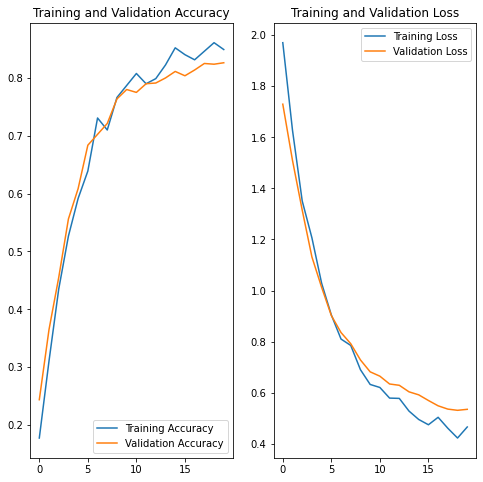

In [28]:
epochs = 20
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
model.evaluate(test_gen[0][0].tolist(),test_gen[0][1].astype(int).tolist())


4/4 [==============================] - 1s 124ms/step - loss: 0.3678 - acc: 0.9100


[0.36776402592658997, 0.9100000262260437]

it needs both images and labels to be in a list to evaluate

imagedatagenerator fuction gives us arrays of both the images and their lable classes, and the lables will be represented as an index of the class respectivly


In [30]:
test_gen[0][1].astype(int).tolist()[10]

3

see the sunflower which has the index 3 according the right arrange 


> 1. daisy
2. dandeliion
3. rose
4. sunflower
5. tulip


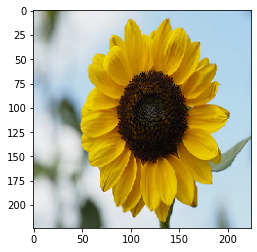

In [31]:
plt.imshow(test_gen[0][0][10])

let's predict it using our model

In [32]:
p = model.predict(np.array([test_gen[0][0][10]]))
p

array([[ 1.1670777,  0.137406 , -1.9373755,  1.8670777, -1.572585 ]],
      dtype=float32)

In [33]:
acc =np.argmax(p)
acc

3

And (الحمد لله كثيرا) our model got it right!